In [5]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
Consumer_Key = "vk9qCD9Ia25EvbwiRHrK8kn2f"
Consumer_Secret_Key = "aQV1MaIWMLhVmVFKAoY2lQTJnZ1Oc4idFimDeUDQ2OKyglTgI6"
Access_Token = "1236192381872947200-pLZGzNZgSAZJqvk7gcmgMnHCa2DhpZ"
Access_Token_Secret = "XJvtrFU9lVVx8L1arOHaw12wvSdQxQZOcVy1GTWFhJvny"

In [8]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [9]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [24]:
posts = api.user_timeline(screen_name="jokowi", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Saya bertemu para pegiat agraria hari ini untuk mendengarkan masukan mengenai berbagai persoalan terkait program reforma agraria yang telah berjalan. 

Dengan masukan itu, saya berharap tujuan reforma agraria bisa tercapai lebih cepat dan dirasakan manfaatnya oleh masyarakat. https://t.co/rt0iKcwB46

2) Dua tahun ini saya telah menandatangani berbagai Peraturan Pemerintah dan Peraturan Presiden sebagai payung regulasi untuk para penyandang disabilitas. 

Tugas semua pihak untuk memastikan semua kebijakan itu terlaksana dan dirasakan manfaatnya oleh penyandang disabilitas.

3) Pemerintah selalu berupaya meningkatkan kesetaraan dan kesempatan terhadap akses pendidikan, kesehatan, pekerjaan, serta infrastruktur bagi para penyandang disabilitas.

Tidak boleh ada satupun penyandang disabilitas yang  tertinggal dari berbagai program layanan pemerintah. https://t.co/w4d2QLSxoV

4) Di sekitar kita, terdapat para penyandang disabilitas yang belajar, bekerja, dan ik

In [25]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Saya bertemu para pegiat agraria hari ini untu...
1,Dua tahun ini saya telah menandatangani berbag...
2,Pemerintah selalu berupaya meningkatkan keseta...
3,"Di sekitar kita, terdapat para penyandang disa..."
4,Saya juga mengajak seluruh masyarakat untuk te...


In [26]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Saya bertemu para pegiat agraria hari ini untu...
1,Dua tahun ini saya telah menandatangani berbag...
2,Pemerintah selalu berupaya meningkatkan keseta...
3,"Di sekitar kita, terdapat para penyandang disa..."
4,Saya juga mengajak seluruh masyarakat untuk te...
...,...
95,"Kita punya pengalaman, selepas libur panjang t..."
96,"Di foto ini, Ibu Yuni, pemilik usaha roti ruma..."
97,"Selama vaksin dan obatnya belum ada, perisai p..."
98,"""Undang-Undang Cipta Kerja adalah upaya reform..."


In [27]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Saya bertemu para pegiat agraria hari ini untu...,0.0,0.0
1,Dua tahun ini saya telah menandatangani berbag...,0.0,0.0
2,Pemerintah selalu berupaya meningkatkan keseta...,0.0,0.0
3,"Di sekitar kita, terdapat para penyandang disa...",0.0,0.0
4,Saya juga mengajak seluruh masyarakat untuk te...,0.0,0.0
...,...,...,...
95,"Kita punya pengalaman, selepas libur panjang t...",0.0,0.0
96,"Di foto ini, Ibu Yuni, pemilik usaha roti ruma...",0.0,0.0
97,"Selama vaksin dan obatnya belum ada, perisai p...",0.0,0.0
98,"""Undang-Undang Cipta Kerja adalah upaya reform...",0.0,0.0


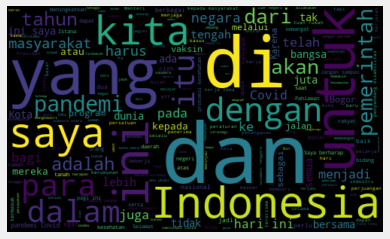

In [28]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Saya bertemu para pegiat agraria hari ini untu...,0.0,0.0,Neutral
1,Dua tahun ini saya telah menandatangani berbag...,0.0,0.0,Neutral
2,Pemerintah selalu berupaya meningkatkan keseta...,0.0,0.0,Neutral
3,"Di sekitar kita, terdapat para penyandang disa...",0.0,0.0,Neutral
4,Saya juga mengajak seluruh masyarakat untuk te...,0.0,0.0,Neutral
...,...,...,...,...
95,"Kita punya pengalaman, selepas libur panjang t...",0.0,0.0,Neutral
96,"Di foto ini, Ibu Yuni, pemilik usaha roti ruma...",0.0,0.0,Neutral
97,"Selama vaksin dan obatnya belum ada, perisai p...",0.0,0.0,Neutral
98,"""Undang-Undang Cipta Kerja adalah upaya reform...",0.0,0.0,Neutral


In [30]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Saya menghargai kerja nyata Muhammadiyah melalui tim khusus Muhammadiyah Covid-19 Command Center, pelayanan di 82 rumah sakit, serta 40 perguruan tinggi yang aktif melayani masyarakat melalui program respons Covid langsung ke akar rumput.

Selamat milad ke-108 Muhammadiyah. 



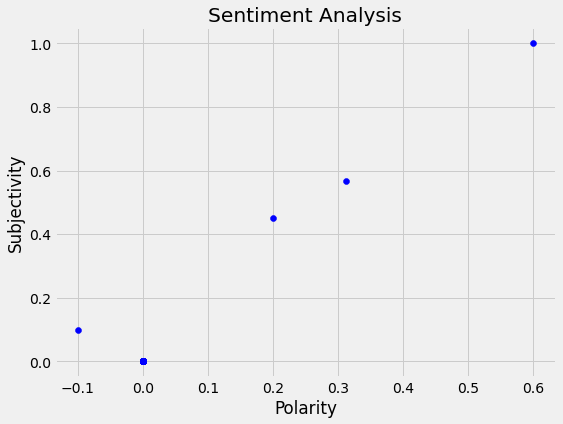

In [31]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [32]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

3.0

In [33]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

1.0

In [34]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     96
Positive     3
Negative     1
Name: Analysis, dtype: int64

In [35]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     96
Positive     3
Negative     1
Name: Analysis, dtype: int64

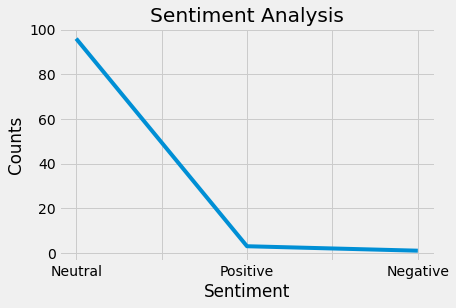

In [36]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

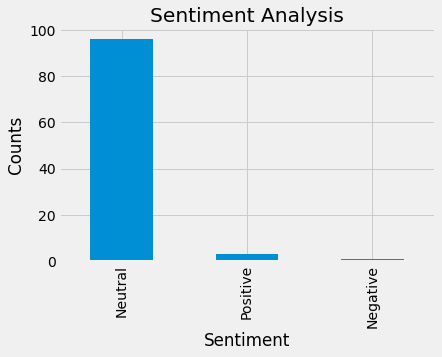

In [37]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()